Example 2.5
===========

This notebook is available on github
[here](https://github.com/aezarebski/aas-extended-examples). If you find
errors or would like to suggest an improvement, feel free to create an
issue.

As usual we will start by importing some useful libraries.

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import os.path as path

In this notebook we will also use an additional module, `heatmap`, which provides a function for drawing heatmaps of the correlations between columns of a pandas dataframe. If you are using Colab please refer to the next cell which shows how to load a remote version of the module and data.

In [3]:
assert path.exists('heatmap.py')
from heatmap import correlation_heatmap

If you are running this notebook somewhere without access to `heatmap.py` then the following snippet will download a copy of it and use that.

In [4]:
assert not path.exists('heatmap.py')

import requests

heatmap_py_url = 'https://raw.githubusercontent.com/aezarebski/aas-extended-examples/main/example-2.5/heatmap.py'
req = requests.get(heatmap_py_url)

with open('urlheatmap.py', 'w') as f:
    f.write(req.text)
    
from urlheatmap import correlation_heatmap

AssertionError: 

The data in `data-auto.csv` is a popular dataset of car characteristics. In this notebook we will be looking at the miles per gallon (MPG) achieved by these cars based on some features of the cars and where/when they were produced. The `origin` of the car is encoded as an integer, (recall you can use the `dtypes` method to see this). The representation of the data is clearer by mapping it to a string describing the origin.

In [5]:
data_csv = 'data-auto.csv'
if not path.exists(data_csv):
    data_csv = 'https://raw.githubusercontent.com/aezarebski/aas-extended-examples/main/example-2.5/data-auto.csv'
df = pd.read_csv(data_csv)

In [6]:
df.origin = df.origin.map({1: 'America', 2: 'Europe', 3: 'Japan'})

In [7]:
col_names = df.columns.to_list()
numeric_cols = col_names[0:7] 

A heatmap of the correlations between the variables in the data is a good way to get a feel for the data.

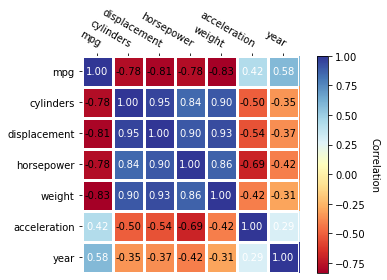

In [8]:
correlation_heatmap(df[numeric_cols])
plt.show()

<Figure size 432x288 with 0 Axes>

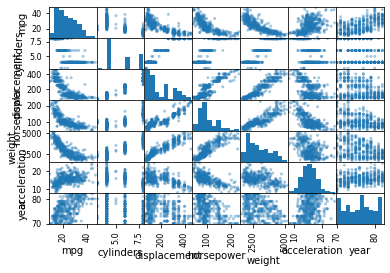

In [9]:
plt.figure()
pd.plotting.scatter_matrix(df[numeric_cols], alpha = 0.4)
plt.show()

### Question

What do you notice about `cylinders`, `displacement`, `horsepower` and `weight`?

### Question

Fit an ordinary linear regression for the MPG using all of the variables (excluding the name of the car). Print a summary of the fitted model. Comment on the results, how has the MPG changed over time?

In [21]:
my_lm = smf.ols('mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + origin',data = df).fit()
my_lm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     224.5
Date:                Thu, 11 Nov 2021   Prob (F-statistic):          1.79e-139
Time:                        09:41:44   Log-Likelihood:                -1020.5
No. Observations:                 392   AIC:                             2059.
Df Residuals:                     383   BIC:                             2095.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          -17.9546      4.677     -3.839      0.000     -27.150      -8.759
origin[T.Europe]     2.6300      0.566      4.643      0.000       1.516       3.744
origin[T.Japan]      2.8532      0.553      5.162      0.000       1.766       3.940
cylinders           -0.4897      0.321     -1.524      0.128      -1.121       0.142
displacement         0.0240      0.008      3.133      0.002       0.009       0.039
horsepower          -0.0182      0.014     -1.326      0.185      -0.045       0.009
weight              -0.0067      0.001    -10.243      0.000      -0.008      -0.005
acceleration         0.0791      0.098      0.805      0.421      -0.114       0.272
year                 0.7770      0.052     15.005      0.000       0.675       0.879
==============================================================================
Omnibus:                       23.395   Durbin-Watson:                   1.291
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.452
Skew:                           0.444   Prob(JB):                     3.30e-08
Kurtosis:                       4.150   Cond. No.                     8.70e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.7e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Question

Plot the residuals against the fitted values, what do you notice?

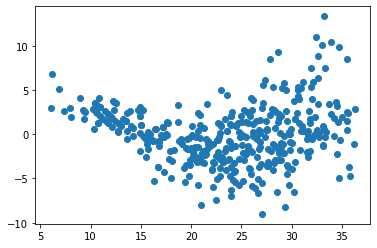

In [22]:
plt.scatter(my_lm.fittedvalues, my_lm.resid)


### Question

Did you get any warnings when you fitted the model? How might you resolve them?

In [23]:
my_lm2 = smf.ols('mpg ~ cylinders + horsepower + weight + acceleration + year + origin',data = df).fit()
my_lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     249.4
Date:                Thu, 11 Nov 2021   Prob (F-statistic):          1.37e-138
Time:                        09:43:26   Log-Likelihood:                -1025.4
No. Observations:                 392   AIC:                             2067.
Df Residuals:                     384   BIC:                             2099.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          -18.6146      4.726     -3.939      0.000     -27.906      -9.323
origin[T.Europe]     2.0227      0.538      3.758      0.000       0.964       3.081
origin[T.Japan]      2.3172      0.532      4.359      0.000       1.272       3.362
cylinders            0.1610      0.248      0.649      0.516      -0.326       0.648
horsepower          -0.0056      0.013     -0.419      0.675      -0.032       0.021
weight              -0.0059      0.001     -9.704      0.000      -0.007      -0.005
acceleration         0.0488      0.099      0.494      0.622      -0.146       0.243
year                 0.7593      0.052     14.585      0.000       0.657       0.862
==============================================================================
Omnibus:                       29.159   Durbin-Watson:                   1.247
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.689
Skew:                           0.495   Prob(JB):                     4.41e-11
Kurtosis:                       4.393   Cond. No.                     8.67e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.67e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Question

Apply some transforms to reduce non-linearities in the relationship between the predictors and the response.

In [37]:
df['ln_cylinders'] = np.log(df['cylinders'])
df['ln_horsepower'] = np.log(df['horsepower'])
df['ln_weight'] = np.log(df['weight'])



In [38]:
my_lm3 = smf.ols('mpg ~ ln_cylinders + ln_horsepower + ln_weight + acceleration + year + origin',data = df).fit()
my_lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     306.2
Date:                Thu, 11 Nov 2021   Prob (F-statistic):          7.82e-153
Time:                        09:52:38   Log-Likelihood:                -991.86
No. Observations:                 392   AIC:                             2000.
Df Residuals:                     384   BIC:                             2031.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          110.4446      9.227     11.970      0.000      92.304     128.585
origin[T.Europe]     1.5977      0.497      3.215      0.001       0.621       2.575
origin[T.Japan]      1.8037      0.499      3.614      0.000       0.823       2.785
ln_cylinders         1.2282      1.191      1.031      0.303      -1.114       3.570
ln_horsepower       -5.4280      1.569     -3.460      0.001      -8.512      -2.344
ln_weight          -14.8793      1.848     -8.051      0.000     -18.513     -11.246
acceleration        -0.1830      0.100     -1.823      0.069      -0.380       0.014
year                 0.7437      0.048     15.493      0.000       0.649       0.838
==============================================================================
Omnibus:                       37.749   Durbin-Watson:                   1.361
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               70.453
Skew:                           0.571   Prob(JB):                     5.03e-16
Kurtosis:                       4.735   Cond. No.                     4.72e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.72e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Question

Re-fit the model with the transformed variables and comment on what has changed. Do you need all of the variables?

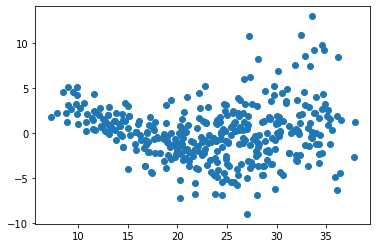

In [39]:
plt.scatter(my_lm3.fittedvalues, my_lm3.resid)


### Question

Include an interaction term between the origin of the cars and their year or release. What does this tell you about car manufactoring in the considered regions?

In [44]:
my_lm4 = smf.ols('mpg ~ cylinders.pow(-1.0) + horsepower.pow(-1.0) + weight.pow(-1.0) + acceleration + year + origin + year * origin',data = df).fit()
my_lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     274.1
Date:                Thu, 11 Nov 2021   Prob (F-statistic):          1.15e-160
Time:                        09:57:11   Log-Likelihood:                -967.40
No. Observations:                 392   AIC:                             1955.
Df Residuals:                     382   BIC:                             1995.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               -43.4058      4.160    -10.433      0.000     -51.586     -35.226
origin[T.Europe]        -32.1143      9.141     -3.513      0.000     -50.088     -14.141
origin[T.Japan]         -18.8509      8.510     -2.215      0.027     -35.583      -2.118
cylinders.pow(-1.0)       8.2847      5.493      1.508      0.132      -2.515      19.084
horsepower.pow(-1.0)    568.7355    133.123      4.272      0.000     306.989     830.482
weight.pow(-1.0)       3.759e+04   4693.686      8.008      0.000    2.84e+04    4.68e+04
acceleration             -0.2015      0.092     -2.187      0.029      -0.383      -0.020
year                      0.6337      0.057     11.114      0.000       0.522       0.746
year:origin[T.Europe]     0.4361      0.120      3.640      0.000       0.201       0.672
year:origin[T.Japan]      0.2597      0.109      2.374      0.018       0.045       0.475
==============================================================================
Omnibus:                       34.689   Durbin-Watson:                   1.539
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               76.626
Skew:                           0.471   Prob(JB):                     2.29e-17
Kurtosis:                       4.951   Cond. No.                     2.59e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.59e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

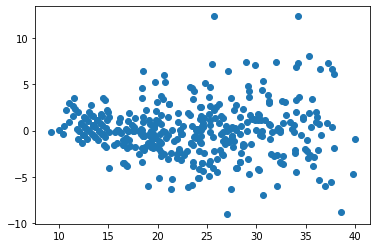

In [45]:
plt.scatter(my_lm4.fittedvalues, my_lm4.resid)
